# Pandas for R&D EDA

Within the *Python* universe, *pandas* is a critical member of the data science stack for both data prep (parsing, cleaning, munging, etc.) and exploratory analysis, making it an ideal tool for inline metrology data, spectroscopy data, defect adder analysis, and even lab tool timeseries data. With capability for interactive exploration via the *Jupyter* ecosystem and also scriptability, the engineer has the freedom for freeform analysis, as well as the reusability of scripts eliminating repetition and user input errors (...cough, Excel, cough, JMP, cough...)

## Data Structures


#### The DataFrame
Assuming you're familiar with the basic *Python* data structures, the boon of the library lies in the `DataFrame` object for two reasons:
1. Ease of use
    * The `DataFrame` is analogous to an Excel spreadsheet (\*shudder\*), wherein the data is expressed as tabular in a row/column format, making the transition for more old-school data analysis to *Pandas* relatively painless-- even for researchers with little programming experience.
    * Inputs galore. The `DataFrame` can be instantiated with lots of different input types: lists and dicts (or combinations thereof), numpy ndarrays, other `DataFrame`s, can be read from .txt, .csv, .tsv, and even from SQL queries
    * *Pandas* is built on *Numpy*, which allows for really convenient interoperability, as well as largely parallel syntax

2. Speed!
    * Being that *Pandas* is built on *Numpy*, so the tasks run on C optimized computations.

#### The Series
While the `DataFrame` is presumably most popular *Pandas* object, the `Series` is probably a close second with similar functionality but for 1D data, so its a good place to start the demo.

In [1]:
import numpy as np
import pandas as pd  # "pd" is the conventional handle used for the import

# Assume you have a dictionary containing adder data with 
# the WaferID as the key and the adder count as the value.
samples = 26
adders = {'C2W{}'.format(slot):adders for slot, adders in \
          zip(np.arange(1, samples), np.random.randint(100, size=samples))}

The dictionary doesn't give us much in the ways of data analysis, but passing the dictionary to the `Series` constructor opens up a lot of doors.

In [2]:
adderSeries = pd.Series(adders)
# .head() retrives n first rows (default 5)
adderSeries.head()

C2W1    55
C2W2    54
C2W3    63
C2W4    40
C2W5    63
dtype: int64

In [3]:
# Descriptive statistics can be accessed through the .describe() method
adderSeries.describe()

count    25.000000
mean     49.080000
std      31.832792
min       0.000000
25%      21.000000
50%      55.000000
75%      69.000000
max      97.000000
dtype: float64

The `Series` object comes with useful Pandas-specific functions like `.describe()`, but also comes with the *Numpy* ndarray methods we know and love, so there's no need to write your own functions for basic-to-intermediate statistics 

In [4]:
print(f"Adder variance: {adderSeries.var()}")
print(f"Adder range: {adderSeries.ptp()}")

Adder variance: 1013.3266666666669
Adder range: 97


The `Series` bears a lot of similarity to the 1D numpy array, with the structure of more tabular-style data, which leads us to the *index*.

### The Index 

An important point about both the `Series` and the `DataFrame` is the presence of the **index**. In the above example of passing a `dict` to the `Series`, the key serves as the index for the corresponding value.

In [5]:
adderSeries.index

Index(['C2W1', 'C2W2', 'C2W3', 'C2W4', 'C2W5', 'C2W6', 'C2W7', 'C2W8', 'C2W9',
       'C2W10', 'C2W11', 'C2W12', 'C2W13', 'C2W14', 'C2W15', 'C2W16', 'C2W17',
       'C2W18', 'C2W19', 'C2W20', 'C2W21', 'C2W22', 'C2W23', 'C2W24', 'C2W25'],
      dtype='object')

In [6]:
adderSeries.values

array([55, 54, 63, 40, 63, 37,  1, 97, 94, 72,  8,  0, 66, 54,  0, 93, 71,
       44,  7, 68, 21,  3, 91, 69, 56], dtype=int64)

Why is this imporant? For one, user indexability. Being able to manipulate data through indexing is one of *Pandas* greatest strengths, allowing the user more granular data extraction. Indexing is supported through the following:
* `.loc`, which is primarily a label based indexer
* `.iloc`, which is an integer based indexer 
* good ole' `[]`, which accesses column names

In [7]:
# Perhaps the last five wafers are the only datapoints of interest
highAdders = adderSeries.iloc[-5:]
print(f"Mean adders in last five wafers: {highAdders.mean()}")

# Or perhads you are interested in the WaferID's of the three highest 
# adder counts, but not necessarily interested in their values
topThreeAdders = adderSeries.sort_values(ascending=False)[:3].index.values
print(f"The slot with the highest adder count is {topThreeAdders}")

Mean adders in last five wafers: 48.0
The slot with the highest adder count is ['C2W8' 'C2W9' 'C2W16']


### DataFrame and EDA

In [83]:
# Say you've run a DOE with four conditions, and want to do some prelim EDA
slots = ['C1W{}'.format(x) for x in range(1, 26)]
tests = ['lot_{}'.format(x) for x in range(1, 5)]

mus = [500, 300, 250, 200]
sigmas = [15, 50, 50, 40]
doe = np.random.normal(loc=mus, scale=sigmas, size=(len(slots), len(mus)))
doe[:, 0] = doe[:, 0] * np.linspace(1, 2, len(doe))
doe[:, 1] = doe[:, 1] * np.linspace(1, 1.5, len(doe))

# Numpy ndarray passed to the constructor, and optional index/column data
adder_df = pd.DataFrame(doe, index=slots, columns=tests)

Here, you'll see the columns representing individual data points, or wafers, and the columns representing DOE splits.

In [84]:
adder_df.head()

,lot_1,lot_2,lot_3,lot_4
C1W1,500.203129,200.116724,238.672172,224.436746
C1W2,511.209122,300.067363,323.478956,207.488216
C1W3,506.363557,282.715253,155.216931,181.813263
C1W4,549.536034,257.586134,280.671699,172.373247
C1W5,631.109633,287.364356,260.046801,210.589070


As we saw before, this is a good step for general descriptive statistics.

In [55]:
adder_df.describe()

,1,2,3,4
count,25.000000,25.000000,25.000000,25.000000
mean,760.420611,360.511135,257.268909,203.905100
std,163.611210,78.669095,40.820412,39.908966
min,499.037764,231.195855,178.112744,149.250433
25%,620.810222,307.731385,226.094237,178.120291
50%,735.026865,355.974589,265.026037,200.688958
75%,896.135338,421.576566,286.228560,223.418470
max,1018.987013,490.328804,328.064934,322.193132


From here, you can perform aggregate analysis on the full dataset, or index into a test of interest.

In [56]:
# Say you're interested in the second test of the DOE
splitTwo = adder_df[2]

In [57]:
splitTwo.describe()

count     25.000000
mean     360.511135
std       78.669095
min      231.195855
25%      307.731385
50%      355.974589
75%      421.576566
max      490.328804
Name: 2, dtype: float64

### Visualization
Descriptive statistics via `.describe()`, `.info()`, `.unique()`, etc. are good preliminary windows into your data, but real EDA requires effective charting. Enter matplotlib, into which *Pandas* offers a wrapper around matplotlib's plotting functionality.

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

Continuing with the `adder_df`, taking a look at the distributions can let us know which samples to start testing statistical inference.

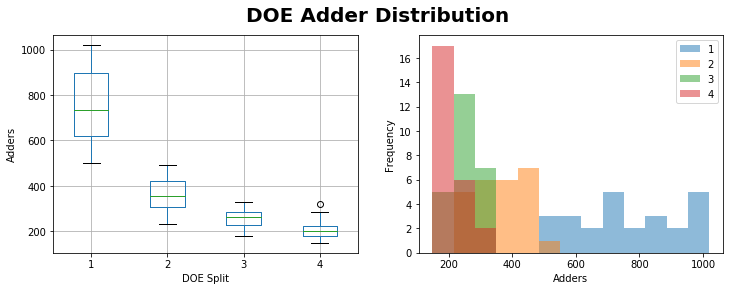

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting functions can be called directly to the DataFrame instance
adder_df.boxplot(ax=axes[0])
axes[0].set_xlabel('DOE Split')
axes[0].set_ylabel('Adders')

adder_df.plot.hist(ax=axes[1], bins=13, alpha=0.5)
axes[1].set_xlabel('Adders')

# TIP: adding a semi-colon to your last plotting function
# within the cell can serve to replace the plt.show() function
plt.suptitle('DOE Adder Distribution', size=20, weight='bold');

For our purposes, the example above may seem too trivial of a dataset. But therein lies the power of *Pandas*... where in more conventional software tools effort scales with the size of the data, *Pandas* effort is O(const) ;) Let's try an example of a more robust dataset more in line with our work.

Say you have a hunch that HF flow to the brush box may be contributing to the difference in adder counts.

In [81]:
np.random.seed(1234)
samples = 100000 #s
time_series = pd.date_range('06/06/17', periods=samples, freq='s')

hf_flow = pd.DataFrame(np.random.randn(samples, 4)/50, \
                           index=time_series, columns=[1, 2, 3, 4]).cumsum()+ 200
hf_flow.columns = ['flow_{}'.format(x) for x in range(1, len(hf_flow.columns) + 1)]

In [82]:
hf_flow.describe()

,flow_1,flow_2,flow_3,flow_4
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,192.382032,198.141525,202.065801,202.265056
std,4.909185,2.862942,1.710664,0.851090
min,185.485386,192.660238,198.435387,199.799059
25%,188.002959,194.859118,200.697098,201.777123
50%,190.963313,199.465734,201.628435,202.373820
75%,196.610011,200.444540,203.533681,202.836706
max,201.542497,202.357285,206.652742,204.268747


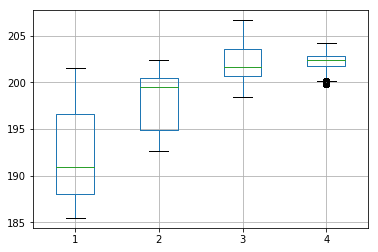

In [17]:
hf_flow.boxplot()

There definitely seems to be a trend in distributions, but with timeseries data, standard line plots tend to be more telling.

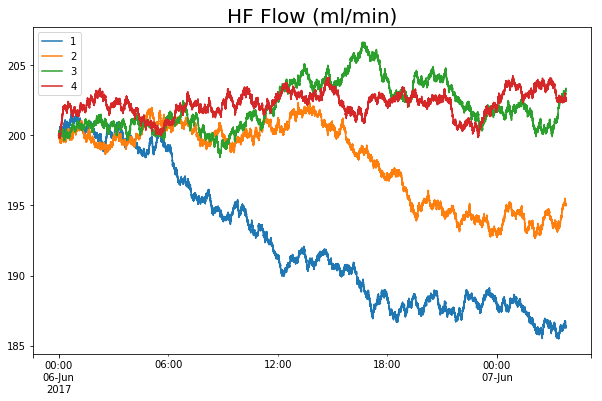

In [18]:
hf_flow.plot(figsize=(10, 6))
plt.title('HF Flow (ml/min)', size=20);

Ah, now we're getting somewhere. Split one shows a decay in flow of HF, which could definitely be root cause for high defect levels.

Say we also scrape CFM run time data to get timestamps of each wafer's run.

In [50]:
timestamps = time_series[::int(len(time_series)/25)]

## Split-Apply-Combine 
We have three structures that may have give insight into our process, specifically our defectivity being tied to HF flow. There exists convenient functionality in pandas' `groupby` objects to tell a better store out of bulky datasets. Performing groupby operations is not unlike making SQL queries on separate tables within a database. But instead of a database connection, you have these "tables" (dataframes) right in your namespace.

One approach to aligning time stamps between our HF and our process times would be to group the HF data by the same time interval as the process times, which can be done with `TimeGrouper`.

In [90]:
# Generate run interval
interval = timestamps.to_series().diff().value_counts().idxmax()
# Create grouper by interval
run_groups = pd.Grouper(freq=interval)
# Create groupby object from grouper
flow_by_interval = hf_flow.groupby(run_groups)
# Apply function to groupby object
mean_flow = flow_by_interval.mean()

mean_flow.index == timestamps

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

We've verified our groupby object reflects the timestamps of our process, thus it would be fair to assign the corresponding wafer ID's to the index of `mean_flow`. With like indices, we can use `merge` on the two datasets, like a "join" in SQL.

In [132]:
mean_flow.index = slots
process_space = pd.merge(adder_df, mean_flow, left_index=True, right_index=True)

flow_melt = mean_flow.melt()
flow_melt.columns = ['condition', 'hf_flow']
adder_melt = adder_df.melt()
adder_melt.columns = ['lot', 'adders']

In [133]:
flow_vs_adder = pd.concat([flow_melt, adder_melt], axis=1)

In [134]:
flow_vs_adder.drop('condition', axis=1, inplace=True)
flow_vs_adder.drop('lot', axis=1, inplace=True)

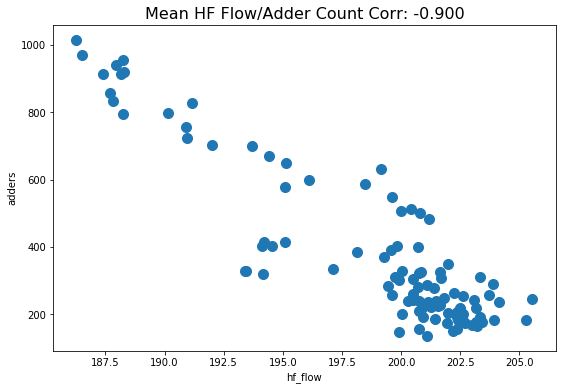

In [156]:
flow_vs_adder.plot('hf_flow', 'adders', kind='scatter', figsize=(9, 6),\
                  s=100)
flow_vs_adder_corr = flow_vs_adder.corr().iloc[0,1]
plt.title('Mean HF Flow/Adder Count Corr: {:.3f}'.format(flow_vs_adder_corr),\
         size=16);

In [177]:
def pearson_r(x, y):
    """
    Helper function to compute pearson
    correlation coefficient
    
    input
    -----
    x: numpy array
    y: numpy array
    
    output
    -----
    float: pearson r
    
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    s_x = np.sqrt(np.sum((x - x_mean)**2))
    s_y = np.sqrt(np.sum((y - y_mean)**2))
    
    r = np.sum((x - x_mean) * (y - y_mean)) / (s_x * s_y)
    return r

In [178]:
pearson_r(flow_vs_adder.iloc[:, 0], flow_vs_adder.iloc[:, 1])

-0.9000162437697534

That's a very strong correlation, and will likely only need brief regression analysis and inference work to verify the finding (see "Statistical_Inference_inPython.ipynb" for more on statistical inference and Bayesian analysis.)

There's more than one way to skin a cat, and everyone has their own style when it comes to data exploration. The main takeway is that the Pandas library is robust enough to handle your style, from simple computations to advanced analysis.